___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import datetime as dt

In [2]:
df = pd.read_csv('weather.csv')

In [3]:
df.shape

(8022, 26)

In [4]:
df.head(2)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(2)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
8020,USW00014765,2015-12-30,6.93,30.0,35.0,27.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8021,USW00014765,2015-12-31,8.05,39.0,50.0,35.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AWND,4017.0,8.593707,3.364601,0.22,6.26,8.05,10.29,26.84
TAVG,1217.0,52.493016,17.829792,6.00,39.00,54.00,68.00,86.00
TMAX,8005.0,61.247096,18.495043,13.00,46.00,62.00,77.00,102.00
TMIN,7996.0,42.099425,17.386667,-10.00,29.00,42.00,57.00,77.00
WT01,1777.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
WT02,221.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
WT03,227.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
WT04,119.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
WT05,360.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
WT06,25.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00


In [7]:
df.columns

Index(['STATION', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22'],
      dtype='object')

In [8]:
df[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


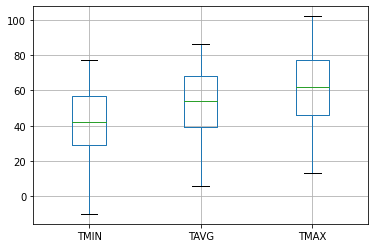

In [9]:
df[['TMIN', 'TAVG', 'TMAX']].boxplot();

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [10]:
# # ['STATION', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
#        'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
#        'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22']

In [11]:
temp_diff = df['TDIFF'] = df['TMAX'] - df['TMIN']

In [12]:
df['TDIFF'].shape

(8022,)

In [13]:
temp_diff = pd.DataFrame(temp_diff)

In [14]:
round(df[['TDIFF']].describe(), 2)

,TDIFF
count,7994.00
mean,19.15
std,7.01
min,-25.00
25%,14.00
50%,19.00
75%,24.00
max,48.00


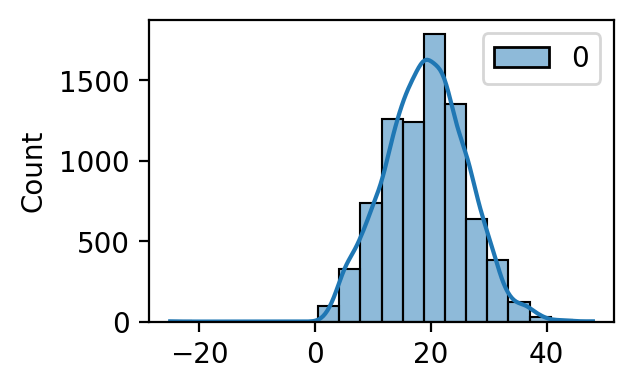

In [15]:
plt.figure(figsize=(3, 2), dpi=200)
sns.histplot(temp_diff, kde = True, bins = 20);

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [16]:
df.columns

Index(['STATION', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22',
       'TDIFF'],
      dtype='object')

In [17]:
df.loc[:, 'WT01':'WT22'].sample(5)

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6157,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4515,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [18]:
WT = df.loc[:, 'WT01':'WT22']

In [19]:
WT.shape

(8022, 20)

In [20]:
bad_conditions = WT.sum(axis=1)

In [21]:
WT.notna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
8017    1
8018    0
8019    3
8020    2
8021    1
Length: 8022, dtype: int64

In [22]:
WT['bad_conditions'] = bad_conditions

In [87]:
df['bad_conditions'] = bad_conditions

In [88]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good


In [89]:
WT.columns

Index(['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09',
       'WT10', 'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19',
       'WT21', 'WT22', 'bad_conditions', 'rating'],
      dtype='object')

In [96]:
WT.bad_conditions.isnull().sum()  # 0di zaten ama

0

In [25]:
WT['bad_conditions'].fillna(0, inplace=True)

In [94]:
df.bad_conditions.isnull().sum()  # 0di zaten ama

0

In [95]:
df['bad_conditions'].fillna(0, inplace=True)

In [26]:
WT.head(5)

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [27]:
WT['bad_conditions'].value_counts()

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
9.0       4
8.0       4
Name: bad_conditions, dtype: int64

In [114]:
WT['bad_conditions'].value_counts().sort_values(ascending=False)

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
9.0       4
8.0       4
Name: bad_conditions, dtype: int64

In [115]:
WT_day_report = WT['bad_conditions'].sort_values(ascending=False)

In [112]:
WT['bad_conditions'].value_counts().sort_index(ascending=False)

9.0       4
8.0       4
7.0      41
6.0     101
5.0     282
4.0     476
3.0     380
2.0     368
1.0     628
0.0    5738
Name: bad_conditions, dtype: int64

In [113]:
WT_cond_report = WT['bad_conditions'].sort_index(ascending=False)

<AxesSubplot:xlabel='bad_conditions', ylabel='Count'>

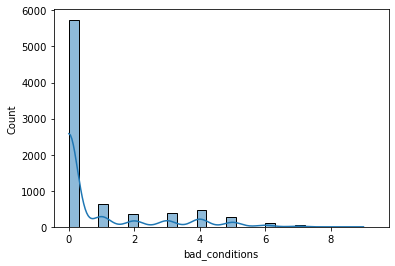

In [124]:
sns.histplot(WT_day_report, kde= True, binwidth = 0.3) # seaborn bizden daha akilli cikti ahengi bozmadi

<AxesSubplot:xlabel='bad_conditions', ylabel='Count'>

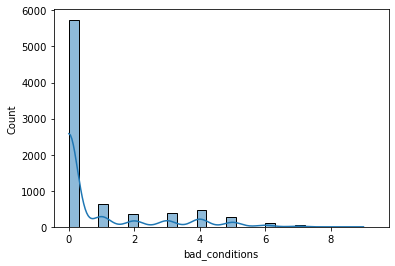

In [122]:
sns.histplot(WT_cond_report, kde= True, binwidth = 0.3)  # seaborn bizden daha akilli cikti ahengi bozmadi

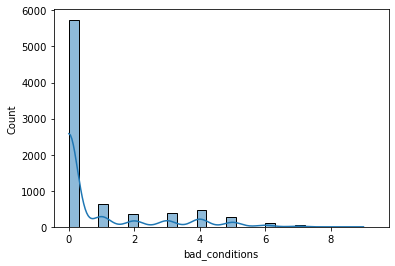

In [125]:
sns.histplot(WT['bad_conditions'], kde= True, binwidth = 0.3);

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [29]:
WT['bad_conditions'].sort_values().unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [126]:
mapping = {0: "good", 1: "bad", 2: "bad", 3: "bad", 4: "bad", 5: "worse", 6: "worse", 7: "worse", 8: "worse", 9: "worse", }

In [127]:
rating = WT["bad_conditions"].map(mapping)

In [128]:
WT["rating"] = rating

In [129]:
WT.rating.unique()

array(['good', 'bad', 'worse'], dtype=object)

In [131]:
round(WT.rating.value_counts(normalize=True) * 100)

good     72.0
bad      23.0
worse     5.0
Name: rating, dtype: float64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [135]:
cats = list(rating)

In [136]:
cats

['good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 

In [137]:
type(cats)

list

In [138]:
rating_cat = rating.astype('category')

In [139]:
(cats == rating_cat).mean() * 100

100.0

In [140]:
WT.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: object

In [141]:
WT.rating.shape

(8022,)

In [149]:
categ = ["good", "bad", "worse"]
WT.rating = pd.Categorical(WT.rating, categories = categ, ordered = True)
# weather.rating = weather.rating.astype('category')  # bu şekilde de categorik olarak değiştiriebilir.

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [158]:
ri = pd.read_csv('RI_cleaned2.csv')

C:\Users\ata\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [157]:
ri.shape

(48010, 21)

In [156]:
ri.head(2)

,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [153]:
ri.shape

(48010, 21)

In [154]:
df.head(1)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0


In [159]:
df.DATE.shape

(8022,)

In [160]:
WT.head(1)

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,good


In [161]:
WT.rating.shape

(8022,)

In [162]:
weather_rating = pd.concat([df.DATE, WT.rating], axis=1)

In [163]:
weather_rating

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [52]:
ri.shape

(48010, 21)

In [53]:
ri.head(2)

,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [54]:
stop_date = ri.stop_datetime.str.split().apply(lambda x: x[0])

In [55]:
ri['DATE'] = stop_date

In [56]:
ri

,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE
0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02
1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02
2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04
3,2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06
4,2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48005,2006-08-08 22:45:00,RI-2006-35917,Zone K3,300,M,1973.0,33.0,B,Black,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3,2006-08-08
48006,2006-08-08 22:45:00,RI-2006-35918,Zone K3,300,F,1971.0,35.0,B,Black,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3,2006-08-08
48007,2006-08-08 22:53:00,RI-2006-35919,Zone X4,500,M,1952.0,54.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,True,False,Zone X4,2006-08-08
48008,2006-08-08 23:00:00,RI-2006-35920,Zone K1,600,F,1982.0,24.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2006-08-08


In [57]:
weather_rating.shape

(8022, 2)

In [58]:
weather_rating.head(2)

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good


In [59]:
ri_weather = pd.merge(ri, weather_rating, how = 'left')

In [60]:
ri_weather.set_index('stop_datetime', inplace=True)

In [61]:
ri_weather.shape

(95877, 22)

In [ ]:
# ri_weather = pd.merge(ri, weather_rating, left_on = 'stop_date', right_on = 'DATE' how = 'left')
# colon adlari farkli olursa bu sekilde merge olur

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [62]:
ri_weather.is_arrested.mean() * 100

5.181638974936638

In [63]:
(ri_weather.groupby('rating')['is_arrested'].mean() * 100)

rating
bad      5.146244
good     5.126287
worse    6.255902
Name: is_arrested, dtype: float64

In [64]:
(ri_weather.groupby('rating')['is_arrested'].mean() * 100).sort_values(ascending=False)

rating
worse    6.255902
bad      5.146244
good     5.126287
Name: is_arrested, dtype: float64

In [65]:
arrested_rate = round(ri_weather.groupby(['rating'])[['is_arrested']].mean() * 100, 2) 

In [66]:
arrested_rate

,is_arrested
rating,
bad,5.15
good,5.13
worse,6.26


In [67]:
arrested_count = ri_weather.groupby(['rating'])[['id']].count() 

In [68]:
arrested_rate.reset_index(inplace=True)

In [69]:
arrested_count.reset_index(inplace=True)

In [70]:
ri_weather.shape

(95877, 22)

In [71]:
pd.merge(arrested_rate, arrested_count)

,rating,is_arrested,id
0,bad,5.15,26155
1,good,5.13,65486
2,worse,6.26,4236


***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [72]:
arrested_rate

,rating,is_arrested
0,bad,5.15
1,good,5.13
2,worse,6.26


In [73]:
arrest_rate = round(ri_weather.groupby(['rating', 'violation'])[['is_arrested']].mean() * 100, 2) 

In [74]:
arrest_rate

is_arrested
rating violation                       
bad    Equipment                  12.50
       Moving violation           11.63
       Other                      28.34
       Registration/plates        21.43
       Speeding                    2.12
good   Equipment                  12.11
       Moving violation           11.40
       Other                      27.57
       Registration/plates        19.61
       Speeding                    2.31
worse  Equipment                  15.09
       Moving violation           13.38
       Other                      27.08
       Registration/plates        16.67
       Speeding                    2.62

In [75]:
arrest_rate.loc[('worse', ['Speeding']),['is_arrested']]

,,is_arrested
rating,violation,
worse,Speeding,2.62


In [76]:
arrest_rate.loc[(['good', 'bad', 'worse'], 'Speeding'),['is_arrested']]

,,is_arrested
rating,violation,
good,Speeding,2.31
bad,Speeding,2.12
worse,Speeding,2.62


In [77]:
arrest_rate.loc[(['bad'], 'Moving violation'),['is_arrested']]

,,is_arrested
rating,violation,
bad,Moving violation,11.63


In [78]:
arrest_rate.loc[['bad']]

is_arrested
rating violation                       
bad    Equipment                  12.50
       Moving violation           11.63
       Other                      28.34
       Registration/plates        21.43
       Speeding                    2.12

In [79]:
arrest_rate.loc[(['good', 'bad', 'worse']),['is_arrested']]

is_arrested
rating violation                       
good   Equipment                  12.11
       Moving violation           11.40
       Other                      27.57
       Registration/plates        19.61
       Speeding                    2.31
bad    Equipment                  12.50
       Moving violation           11.63
       Other                      28.34
       Registration/plates        21.43
       Speeding                    2.12
worse  Equipment                  15.09
       Moving violation           13.38
       Other                      27.08
       Registration/plates        16.67
       Speeding                    2.62

In [80]:
arrest_rate.loc[(['good', 'bad', 'worse'],['is_arrested'])]

is_arrested
rating violation                       
good   Equipment                  12.11
       Moving violation           11.40
       Other                      27.57
       Registration/plates        19.61
       Speeding                    2.31
bad    Equipment                  12.50
       Moving violation           11.63
       Other                      28.34
       Registration/plates        21.43
       Speeding                    2.12
worse  Equipment                  15.09
       Moving violation           13.38
       Other                      27.08
       Registration/plates        16.67
       Speeding                    2.62

In [81]:
arrest_rate.loc[['good', 'bad', 'worse'],['is_arrested']].sum()

is_arrested    223.86
dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [82]:
ri_weather

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-08-08 22:53:00,RI-2006-35919,Zone X4,500,M,1952.0,54.0,W,White,Speeding,Speeding,...,NaN,False,Citation,False,16-30 Min,True,False,Zone X4,2006-08-08,bad
2006-08-08 23:00:00,RI-2006-35920,Zone K1,600,F,1982.0,24.0,W,White,Speeding,Speeding,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2006-08-08,good
2006-08-08 23:00:00,RI-2006-35920,Zone K1,600,F,1982.0,24.0,W,White,Speeding,Speeding,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2006-08-08,bad


In [83]:
arrest_rate

is_arrested
rating violation                       
bad    Equipment                  12.50
       Moving violation           11.63
       Other                      28.34
       Registration/plates        21.43
       Speeding                    2.12
good   Equipment                  12.11
       Moving violation           11.40
       Other                      27.57
       Registration/plates        19.61
       Speeding                    2.31
worse  Equipment                  15.09
       Moving violation           13.38
       Other                      27.08
       Registration/plates        16.67
       Speeding                    2.62

In [84]:
arrest_rate

is_arrested
rating violation                       
bad    Equipment                  12.50
       Moving violation           11.63
       Other                      28.34
       Registration/plates        21.43
       Speeding                    2.12
good   Equipment                  12.11
       Moving violation           11.40
       Other                      27.57
       Registration/plates        19.61
       Speeding                    2.31
worse  Equipment                  15.09
       Moving violation           13.38
       Other                      27.08
       Registration/plates        16.67
       Speeding                    2.62

In [85]:
round(pd.pivot_table(ri_weather, index = ['rating','violation'])[['is_arrested']] * 100, 2)

is_arrested
rating violation                       
bad    Equipment                  12.50
       Moving violation           11.63
       Other                      28.34
       Registration/plates        21.43
       Speeding                    2.12
good   Equipment                  12.11
       Moving violation           11.40
       Other                      27.57
       Registration/plates        19.61
       Speeding                    2.31
worse  Equipment                  15.09
       Moving violation           13.38
       Other                      27.08
       Registration/plates        16.67
       Speeding                    2.62